In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
penguins = pd.read_csv('C:/Users/HP/Desktop/Classification_Regression_Methods/noisy_datasets/noisy_datasets/penguins.csv')

emission = pd.read_csv('C:/Users/HP/Desktop/Classification_Regression_Methods/noisy_datasets/noisy_datasets/emissions_by_country.csv')
diamond_df = pd.read_csv('C:/Users/HP/Desktop/Classification_Regression_Methods/noisy_datasets/noisy_datasets/diamond.csv')



In [3]:
print(penguins.describe())

       calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.700000         

In [4]:
penguins.shape

(344, 10)

In [5]:
print(penguins.isnull().sum())

species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64


In [6]:
print(penguins['island'].value_counts())

island
Biscoe       160
Dream        114
Torgersen     50
biscoe         4
dream          3
torgersen      1
BISCOE         1
DREAM          1
Name: count, dtype: int64


In [7]:
numeric_cols = penguins.select_dtypes(include=[np.number]).columns
categorical_cols = penguins.select_dtypes(exclude=[np.number]).columns


In [8]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        if not np.isnan(row1[i]) and not np.isnan(row2[i]):
            distance += (row1[i] - row2[i]) ** 2
    return np.sqrt(distance)

def knn_impute_numeric(data, k=5):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if np.isnan(data[i, j]):
                distances = []
                for r in range(data.shape[0]):
                    if r != i and not np.isnan(data[r, j]):
                        distances.append((euclidean_distance(data[i], data[r]), data[r, j]))

                distances.sort(key=lambda x: x[0])
                neighbors = [dist[1] for dist in distances[:k]]
        
                data[i, j] = np.mean(neighbors)
    
    return data
    
penguin_numeric_values = penguins[numeric_cols].values  
penguin_numeric_imputed = knn_impute_numeric(penguin_numeric_values, k=5)

penguins[numeric_cols] = pd.DataFrame(penguin_numeric_imputed, columns=numeric_cols)

for col in categorical_cols:
    penguins[col] = penguins[col].fillna(penguins[col].mode()[0])
print(penguins.isnull().sum())




species                   0
island                    0
calorie requirement       0
average sleep duration    0
bill_length_mm            0
bill_depth_mm             0
flipper_length_mm         0
body_mass_g               0
gender                    0
year                      0
dtype: int64


In [9]:
penguins.shape

(344, 10)

In [10]:
penguins['species'] = penguins['species'].str.capitalize()
penguins['island'] = penguins['island'].str.lower()

In [11]:
penguins['species'] = penguins['species'].astype('category')
penguins['island']=penguins['island'].apply(lambda x: 1 if x=='torgersen' else 0)

In [12]:
penguins.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,1,6563.0,11.0,39.100,18.70,181.0,3750.0,male,2007.0
1,Adelie,1,4890.0,14.0,39.500,17.40,186.0,3800.0,female,2007.0
2,Adelie,1,7184.0,11.0,40.300,18.00,195.0,3250.0,female,2007.0
3,Adelie,1,4169.0,8.0,59.258,17.18,191.6,992.0,male,2007.0
4,Adelie,1,4774.0,8.0,36.700,19.30,193.0,3450.0,female,2007.0


In [13]:
print(sum(penguins['island']))

51


In [14]:
penguins_clean = penguins[(penguins['flipper_length_mm'] >= 180) & (penguins['flipper_length_mm'] <= 210)]
flipper_mean = penguins['flipper_length_mm'].mean()
penguins.loc[(penguins['flipper_length_mm'] < 180) | (penguins['flipper_length_mm'] > 210), 'flipper_length_mm'] = flipper_mean


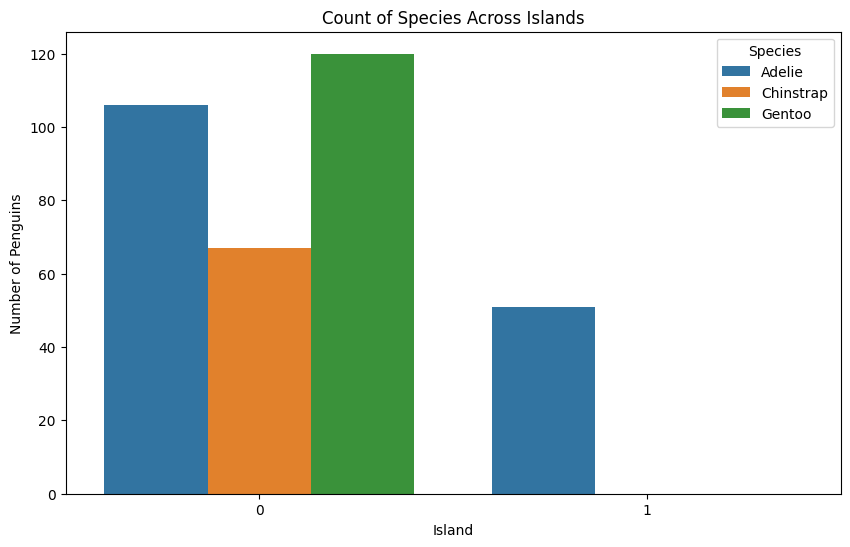

In [15]:
# Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=penguins, x='island', hue='species')
plt.title('Count of Species Across Islands')
plt.ylabel('Number of Penguins')
plt.xlabel('Island')
plt.legend(title='Species')
plt.show()


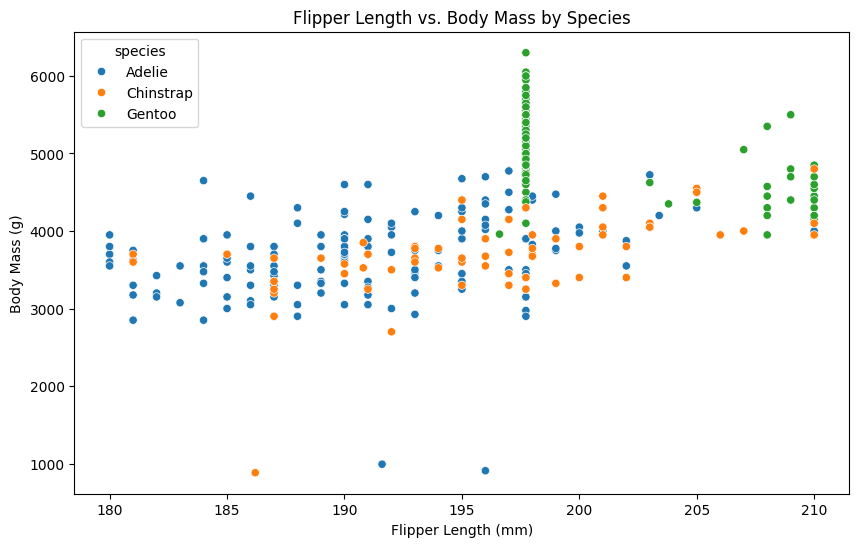

In [16]:
#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Flipper Length vs. Body Mass by Species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()


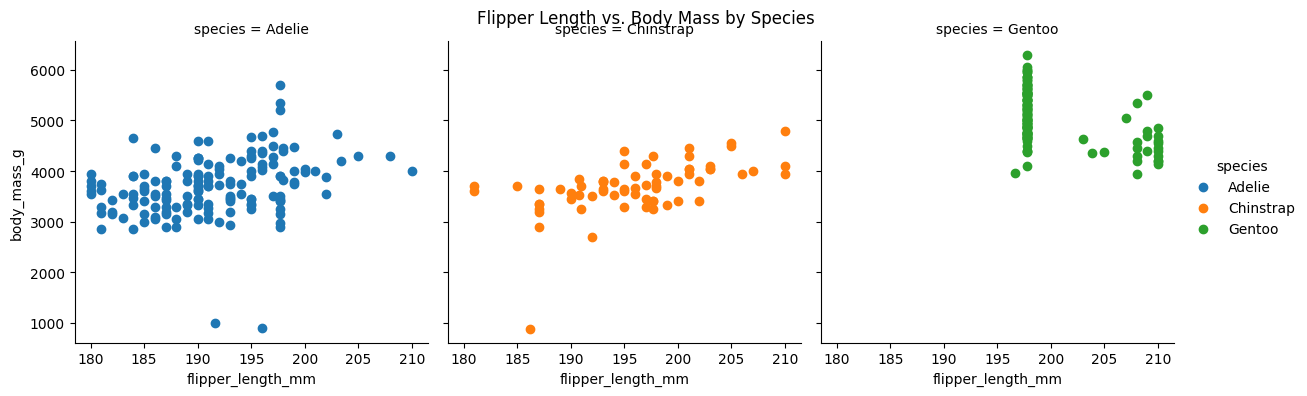

In [17]:
#Facet Grid
g = sns.FacetGrid(penguins, col='species', hue='species', height=4)
g.map(plt.scatter, 'flipper_length_mm', 'body_mass_g')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Flipper Length vs. Body Mass by Species')
plt.show()


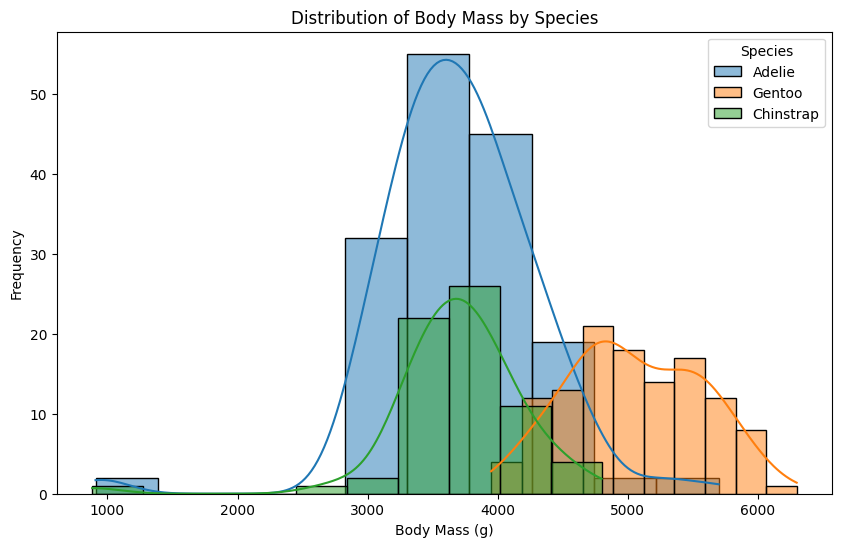

In [18]:
#Histogram
plt.figure(figsize=(10, 6))
for species in penguins['species'].unique():
    subset = penguins[penguins['species'] == species]
    sns.histplot(subset['body_mass_g'], kde=True, label=species, bins=10)
plt.title('Distribution of Body Mass by Species')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.legend(title='Species')
plt.show()


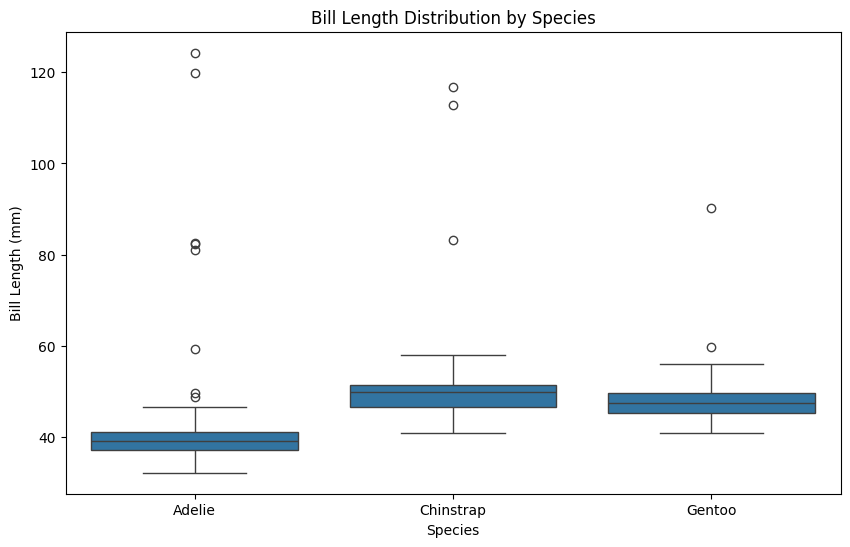

In [19]:
#BoxPlot
plt.figure(figsize=(10, 6))
sns.boxplot(data=penguins, x='species', y='bill_length_mm')
plt.title('Bill Length Distribution by Species')
plt.ylabel('Bill Length (mm)')
plt.xlabel('Species')
plt.show()


In [20]:
penguins_numeric = pd.get_dummies(penguins, drop_first=True)
correlation_matrix = penguins_numeric.corr()
print("Correlation Matrix:\n", correlation_matrix)
penguins_numeric.head()


Correlation Matrix:
                           island  calorie requirement  average sleep duration  \
island                  1.000000             0.026104                0.011456   
calorie requirement     0.026104             1.000000               -0.055628   
average sleep duration  0.011456            -0.055628                1.000000   
bill_length_mm         -0.140961            -0.001948                0.017318   
bill_depth_mm           0.107100            -0.057725                0.009026   
flipper_length_mm      -0.220612            -0.095687                0.099172   
body_mass_g            -0.255554             0.040179                0.054418   
year                   -0.058998            -0.021767                0.038780   
species_Chinstrap      -0.205187            -0.085093               -0.035668   
species_Gentoo         -0.305364             0.022550                0.035797   
gender_MALE            -0.022527            -0.071797                0.060909   
gender_

,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,gender_MALE,gender_female,gender_male
0,1,6563.0,11.0,39.100,18.70,181.0,3750.0,2007.0,False,False,False,False,True
1,1,4890.0,14.0,39.500,17.40,186.0,3800.0,2007.0,False,False,False,True,False
2,1,7184.0,11.0,40.300,18.00,195.0,3250.0,2007.0,False,False,False,True,False
3,1,4169.0,8.0,59.258,17.18,191.6,992.0,2007.0,False,False,False,False,True
4,1,4774.0,8.0,36.700,19.30,193.0,3450.0,2007.0,False,False,False,True,False


In [21]:
species_unique = penguins['species'].unique()
for species in species_unique:
    penguins[species] = penguins['species'].apply(lambda x: 1 if x == species else 0)


In [22]:
min_value_1 = penguins['flipper_length_mm'].min()
max_value_1 = penguins['flipper_length_mm'].max()
penguins['flipper_length_mm'] = (penguins['flipper_length_mm'] - min_value_1) / (max_value_1 - min_value_1)

min_value_2 = penguins['bill_length_mm'].min()
max_value_2 = penguins['bill_length_mm'].max()
penguins['bill_length_mm'] = (penguins['bill_length_mm'] - min_value_2) / (max_value_2 - min_value_2)

min_value_3 = penguins['bill_depth_mm'].min()
max_value_3 = penguins['bill_depth_mm'].max()
penguins['bill_depth_mm'] = (penguins['bill_depth_mm'] - min_value_3) / (max_value_3 - min_value_3)

min_value_4 = penguins['body_mass_g'].min()
max_value_4 = penguins['body_mass_g'].max()
penguins['body_mass_g'] = (penguins['body_mass_g'] - min_value_4) / (max_value_4 - min_value_4)


In [23]:
diamond_df = diamond_df.drop(columns=['Unnamed: 0'])

# Ensure 'carat', 'depth', and 'table' columns are of type float
diamond_df['carat'] = pd.to_numeric(diamond_df['carat'], errors='coerce')
diamond_df['depth'] = pd.to_numeric(diamond_df['depth'], errors='coerce')
diamond_df['table'] = pd.to_numeric(diamond_df['table'], errors='coerce')

# Handling missing values in numeric columns by using mean
diamond_df['carat'].fillna(diamond_df['carat'].mean())
diamond_df['depth'].fillna(diamond_df['depth'].mean())
diamond_df['table'].fillna(diamond_df['table'].mean())


# Handling categorical missing values by using mode
diamond_df['cut'].fillna(diamond_df['cut'].mode()[0])
diamond_df['color'].fillna(diamond_df['color'].mode()[0])

# 4  Handle mismatched string formats
diamond_df['cut'] = diamond_df['cut'].str.capitalize()

# 5 Handle outliers. Detect and manage outliers within the dataset
diamond_df['price'] = pd.to_numeric(diamond_df['price'],errors='coerce')
diamond_clean = diamond_df[(diamond_df['price'] >= 300) & (diamond_df['price'] <= 350)]
flippermean = diamond_df['price'].mean()
diamond_df.loc[(diamond_df['price'] < 300) | (diamond_df['price'] > 350), 'price'] = flippermean


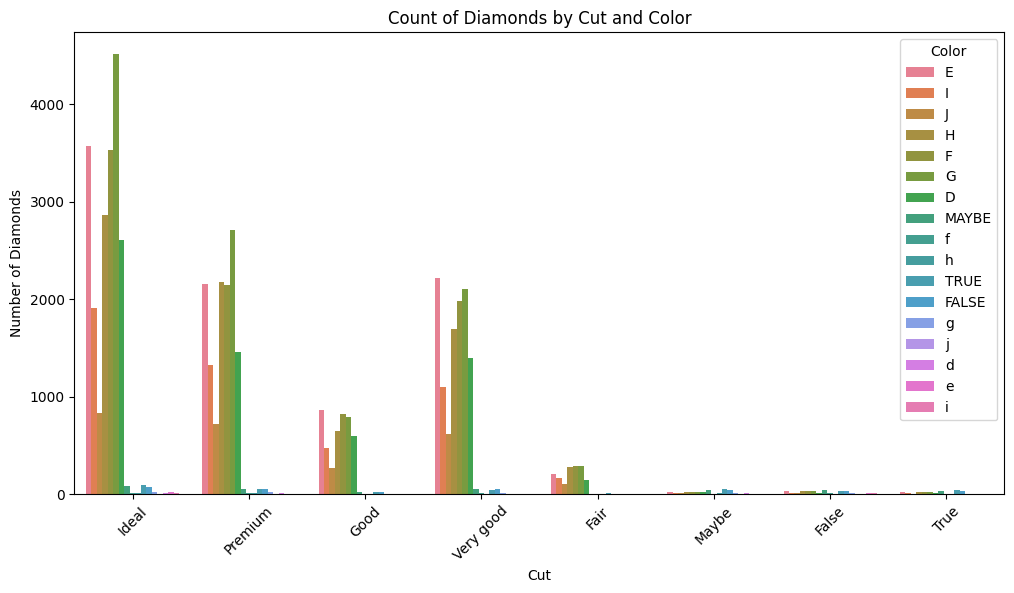

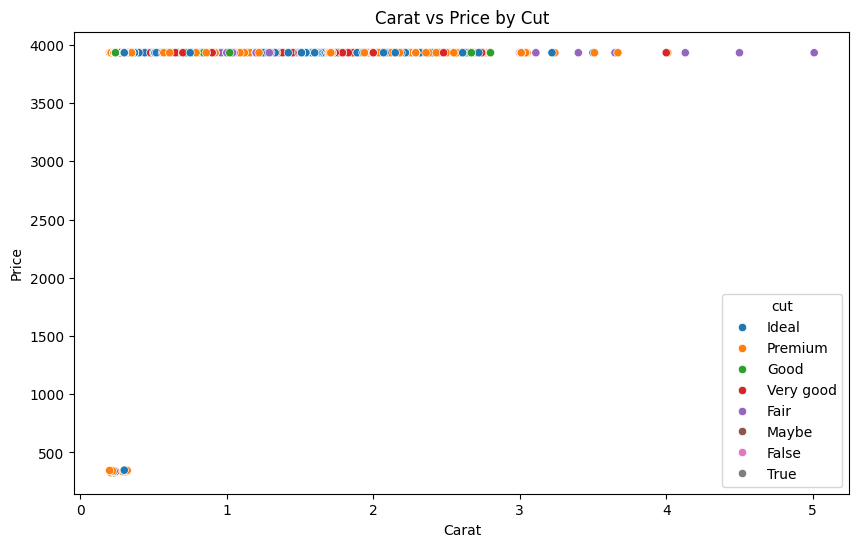

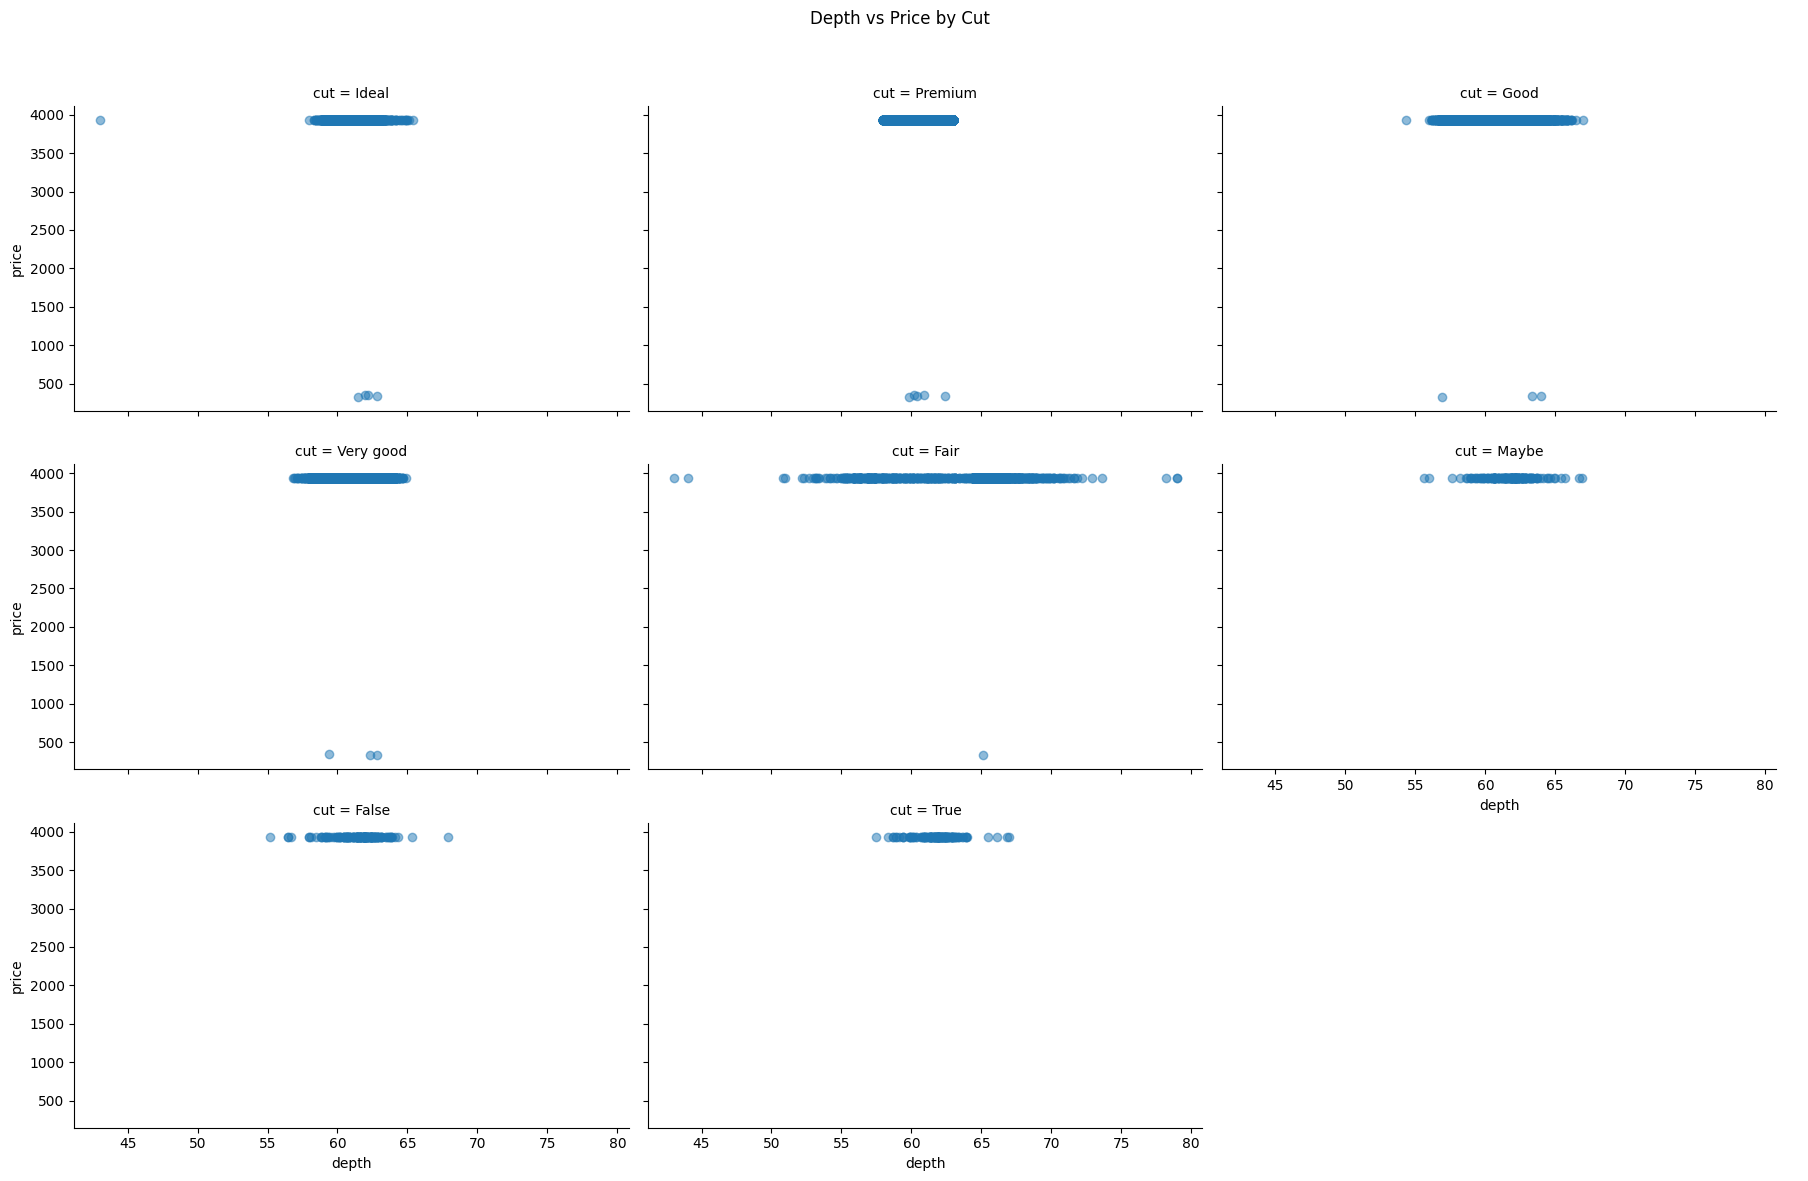

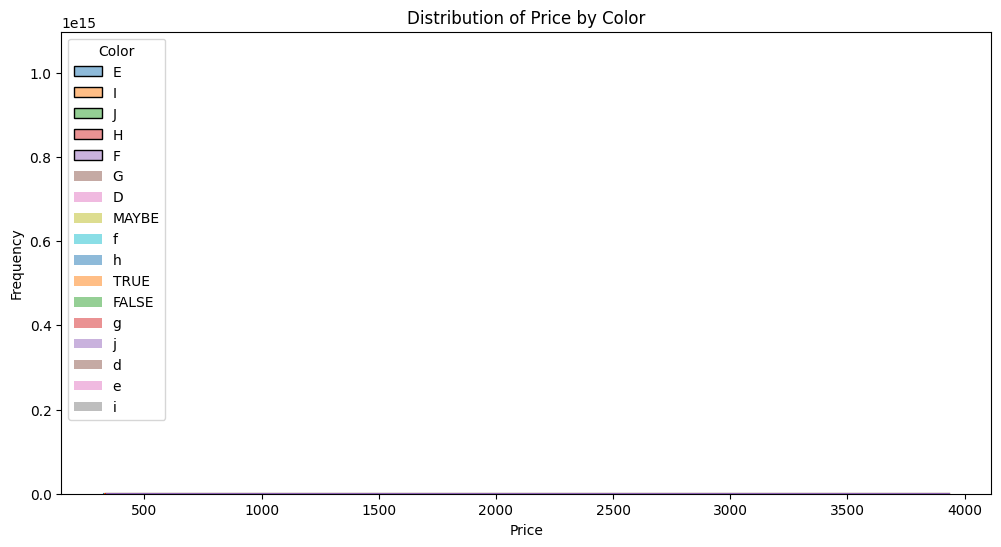

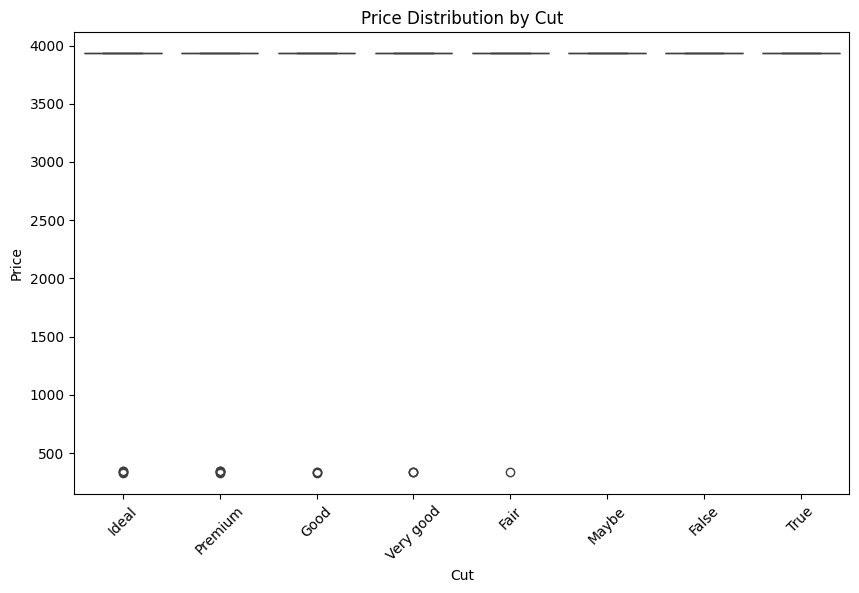

In [24]:
# Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=diamond_df, x='cut', hue='color')
plt.title('Count of Diamonds by Cut and Color')
plt.ylabel('Number of Diamonds')
plt.xlabel('Cut')
plt.legend(title='Color')
plt.xticks(rotation=45)
plt.show()


#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamond_df, x='carat', y='price', hue='cut')
plt.title('Carat vs Price by Cut')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

#Facet Grid
g = sns.FacetGrid(diamond_df, col='cut', col_wrap=3, height=4, aspect=1.5)
g.map(plt.scatter, 'depth', 'price', alpha=0.5)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Depth vs Price by Cut')
plt.show()

#Histogram
plt.figure(figsize=(12, 6))
for color in diamond_df['color'].unique():
    subset = diamond_df[diamond_df['color'] == color]
    sns.histplot(subset['price'], kde=True, label=color, bins=30, alpha=0.5)
plt.title('Distribution of Price by Color')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(title='Color')
plt.show()

#BoxPlot
plt.figure(figsize=(10, 6))
sns.boxplot(data=diamond_df, x='cut', y='price')
plt.title('Price Distribution by Cut')
plt.ylabel('Price')
plt.xlabel('Cut')
plt.xticks(rotation=45)
plt.show()


Column 'x' contains non-numeric data
['3.95' '3.89' '4.05' '4.2' '4.34' '3.94' '4.07' '3.87' '4' '4.25' '3.93'
 '3.88' '4.35' '3.79' '4.38' '4.31' '4.23' '4.21' '4.26' '3.85' '4.39'
 '4.44' '3.97' '4.28' '3.96' '4.04' '4.01' '3.92' '4.06' '3.83' '4.29'
 '4.13' '4.49' '3.99' '4.19' '4.24' '4.36' '4.33' nan '4.45' '3.91' '4.3'
 '4.43' '4.54' '4.78' '4.15' '4.08' '4.03' '4.02' '4.65' '4.22' '5.7'
 '6.45' '5.68' '5.81' '5.85' '5.71' 'FALSE' '5.77' '5.97' '5.8' '6' '5.94'
 '5.87' '5.9' '6.14' '5.38' '5.96' '6.16' '5.73' 'TRUE' '5.98' '6.01'
 '5.64' '5.57' '5.63' '5.65' '6.09' '5.56' '6.11' '5.69' '5.62' '5.88'
 '5.52' '5.74' '5.53' '5.78' '5.89' '5.83' '5.66' '5.82' '5.79' '5.92'
 '5.39' '5.33' '6.83' '5.41' '5.72' 'MAYBE' '5.61' '5.67' '5.76' '6.05'
 '5.6' '5.19' '5.84' '6.39' '5.34' '5.14' '5.11' '5.54' '6.07' '6.29'
 '6.31' '6.49' '5.28' '5.48' '5.55' '6.41' '5.91' '6.17' '6.61' '5.12'
 '6.03' '6.19' '5.43' '5.99' '5.95' '6.37' '5.93' '6.46' '5.22' '5.75'
 '6.21' '6.15' '6.73' '5.49' '4.

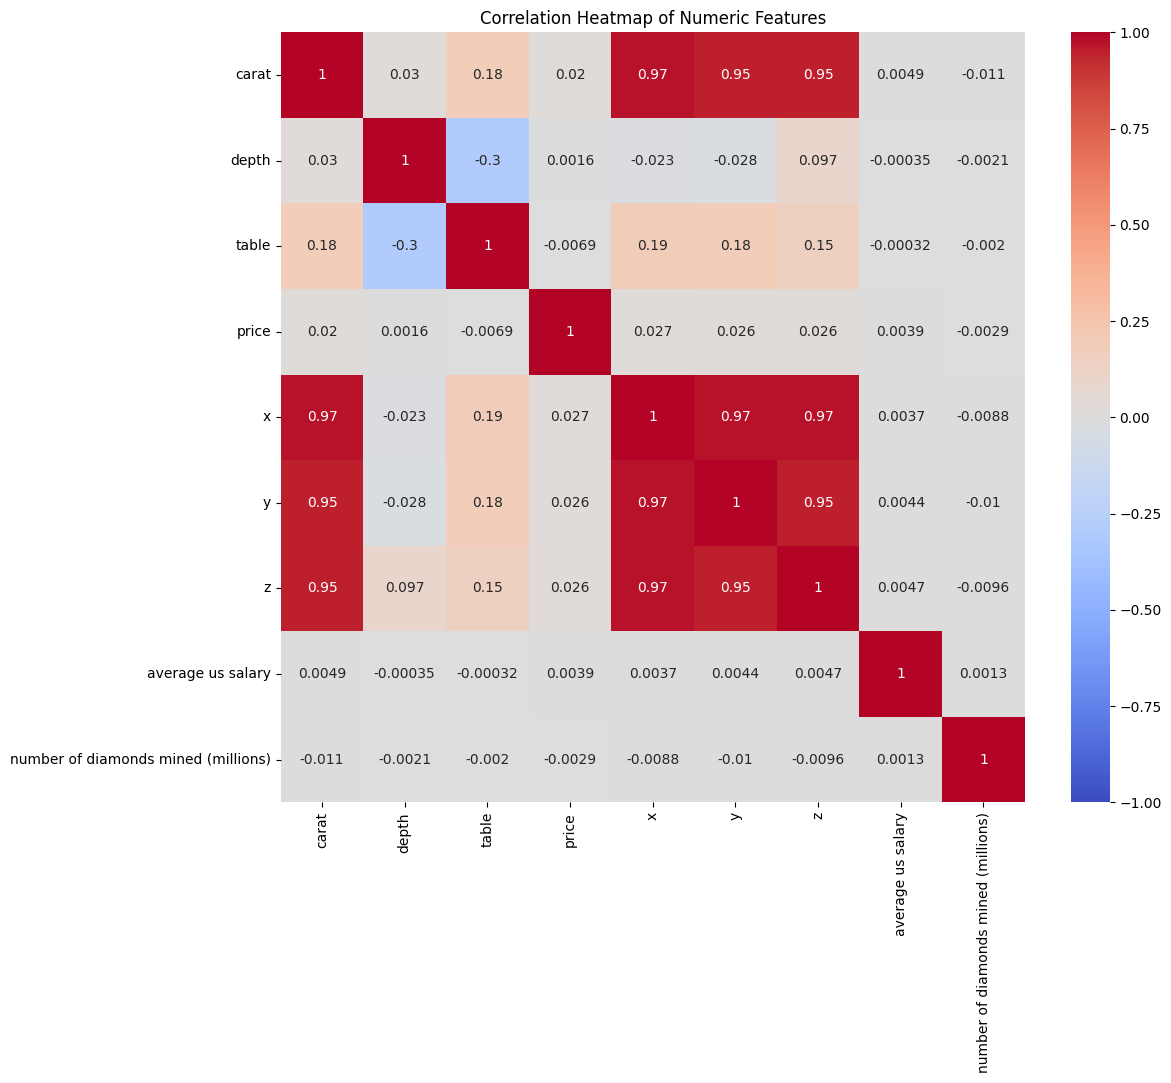

Correlations with price:
depth                                  0.001579
number of diamonds mined (millions)    0.002931
average us salary                      0.003925
table                                  0.006862
carat                                  0.020474
y                                      0.025820
z                                      0.026019
x                                      0.026512
price                                  1.000000
Name: price, dtype: float64

Potentially uncorrelated features (correlation < 0.3):
depth                                  0.001579
number of diamonds mined (millions)    0.002931
average us salary                      0.003925
table                                  0.006862
carat                                  0.020474
y                                      0.025820
z                                      0.026019
x                                      0.026512
Name: price, dtype: float64


In [25]:
numeric_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'average us salary', 'number of diamonds mined (millions)']
for col in numeric_columns:
    if diamond_df[col].dtype == 'object':
        print(f"Column '{col}' contains non-numeric data")
        print(diamond_df[col].unique())
        print()

for col in numeric_columns:
    diamond_df[col] = pd.to_numeric(diamond_df[col].replace('FALSE', np.nan), errors='coerce')
correlation_matrix = diamond_df[numeric_columns].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Identify features with low correlation to price
price_correlations = correlation_matrix['price'].abs().sort_values(ascending=True)
print("Correlations with price:")
print(price_correlations)

# Identify potentially uncorrelated features
low_correlation_threshold = 0.3
low_corr_features = price_correlations[price_correlations < low_correlation_threshold]
print("\nPotentially uncorrelated features (correlation < 0.3):")
print(low_corr_features)


In [26]:
cut_unique = diamond_df['cut'].unique()
for cut in cut_unique:
    diamond_df[cut] = diamond_df['cut'].apply(lambda x: 1 if x == cut else 0)

min_value_1 = diamond_df['depth'].min()
max_value_1 = diamond_df['depth'].max()
diamond_df['depth'] = (diamond_df['depth'] - min_value_1) / (max_value_1 - min_value_1)

min_value_2 = diamond_df['price'].min()
max_value_2 = diamond_df['price'].max()
diamond_df['price'] = (diamond_df['price'] - min_value_2) / (max_value_2 - min_value_2)

min_value_3 = diamond_df['carat'].min()
max_value_3 = diamond_df['carat'].max()
diamond_df['carat'] = (diamond_df['carat'] - min_value_3) / (max_value_3 - min_value_3)

min_value_4 = diamond_df['table'].min()
max_value_4 = diamond_df['table'].max()
diamond_df['table'] = (diamond_df['table'] - min_value_4) / (max_value_4 - min_value_4)

print(diamond_df.isnull().sum())

carat                                  2867
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                  2074
table                                  2910
price                                  2096
x                                      2913
y                                      1732
z                                      2408
Ideal                                     0
Premium                                   0
Good                                      0
Very good                                 0
NaN                                       0
Fair                                      0
Maybe                                     0
False                                     0
True                                      0
dtype: int64


In [27]:
print(emission)

           Country ISO 3166-1 alpha-3    Year         Total  Temperature  \
0      Afghanistan                AFG  1750.0      0.000000           70   
1      Afghanistan                AFG  1751.0      0.000000           66   
2      Afghanistan                AFG  1752.0      0.000000           72   
3      Afghanistan                AFG  1753.0      0.000000           44   
4      Afghanistan                AFG  1754.0      0.000000           21   
...            ...                ...     ...           ...          ...   
63099       Global                WLD  2017.0  36096.739276           22   
63100       Global                WLD  2018.0  36826.506600           44   
63101       Global                WLD  2019.0  37082.558969           78   
63102       Global                WLD  2020.0  35264.085734           34   
63103       Global                WLD  2021.0  37123.850352           36   

       GDP Per Capita (USD)          Coal           Oil          Gas  \
0              

In [28]:
emission.shape

(63104, 13)

In [29]:
print(emission.isnull().sum())

Country                  2017
ISO 3166-1 alpha-3       3621
Year                      797
Total                     723
Temperature                 0
GDP Per Capita (USD)        0
Coal                    41307
Oil                     41330
Gas                     41387
Cement                  42616
Flaring                 41766
Other                   60419
Per Capita              43712
dtype: int64


In [30]:
emission_cleaned = emission.dropna()
print(emission_cleaned.isnull().sum())


Country                 0
ISO 3166-1 alpha-3      0
Year                    0
Total                   0
Temperature             0
GDP Per Capita (USD)    0
Coal                    0
Oil                     0
Gas                     0
Cement                  0
Flaring                 0
Other                   0
Per Capita              0
dtype: int64


In [31]:
emission['Coal'] = pd.to_numeric(emission['Coal'], errors='coerce')
emission['Year'] = pd.to_numeric(emission['Year'], errors='coerce')
emission['Temperature'] = pd.to_numeric(emission['Temperature'], errors='coerce')

# Handling missing values in numeric columns by using mean
emission['Coal'].fillna(emission['Coal'].mean())
emission['Year'].fillna(emission['Year'].mean())
emission['Temperature'].fillna(emission['Temperature'].mean())


# Handling categorical missing values by using mode
emission['Country'].fillna(emission['Country'].mode()[0])
emission['ISO 3166-1 alpha-3'].fillna(emission['ISO 3166-1 alpha-3'].mode()[0])


0        AFG
1        AFG
2        AFG
3        AFG
4        AFG
        ... 
63099    WLD
63100    WLD
63101    WLD
63102    WLD
63103    WLD
Name: ISO 3166-1 alpha-3, Length: 63104, dtype: object

In [32]:
if 'Country' in emission.columns:
    emission['Country'] = emission['Country'].str.capitalize()


In [33]:
if 'Temperature' in emission.columns:
    emission['Temperature'] = emission['Temperature'].astype(float)

    # Assuming temperature_mean is defined somewhere
    temperature_mean = emission['Temperature'].mean()  # Calculate the mean first if not already done
    emission.loc[(emission['Temperature'] < 60) | (emission['Temperature'] > 70), 'Temperature'] = temperature_mean
else:
    print("Column 'Temperature' does not exist in the DataFrame.")


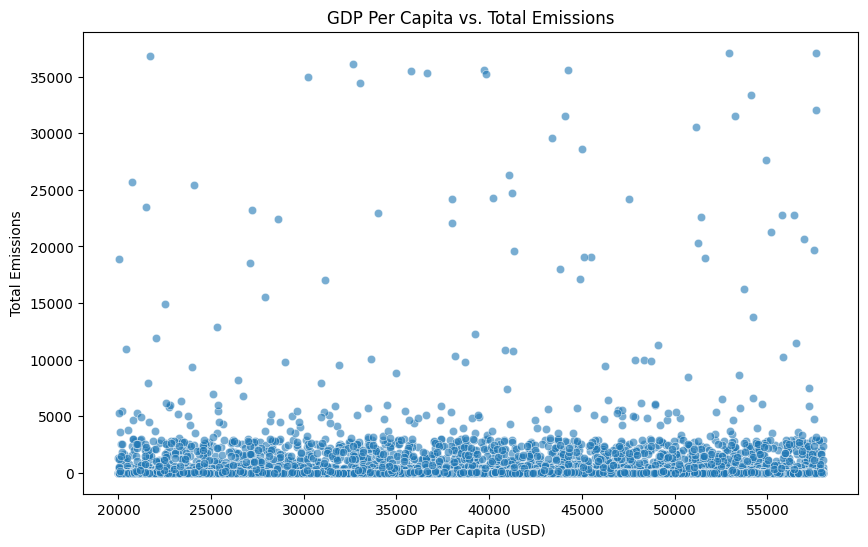

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP Per Capita (USD)', y='Total', data=emission, alpha=0.6)
plt.title('GDP Per Capita vs. Total Emissions')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Total Emissions')
plt.show()


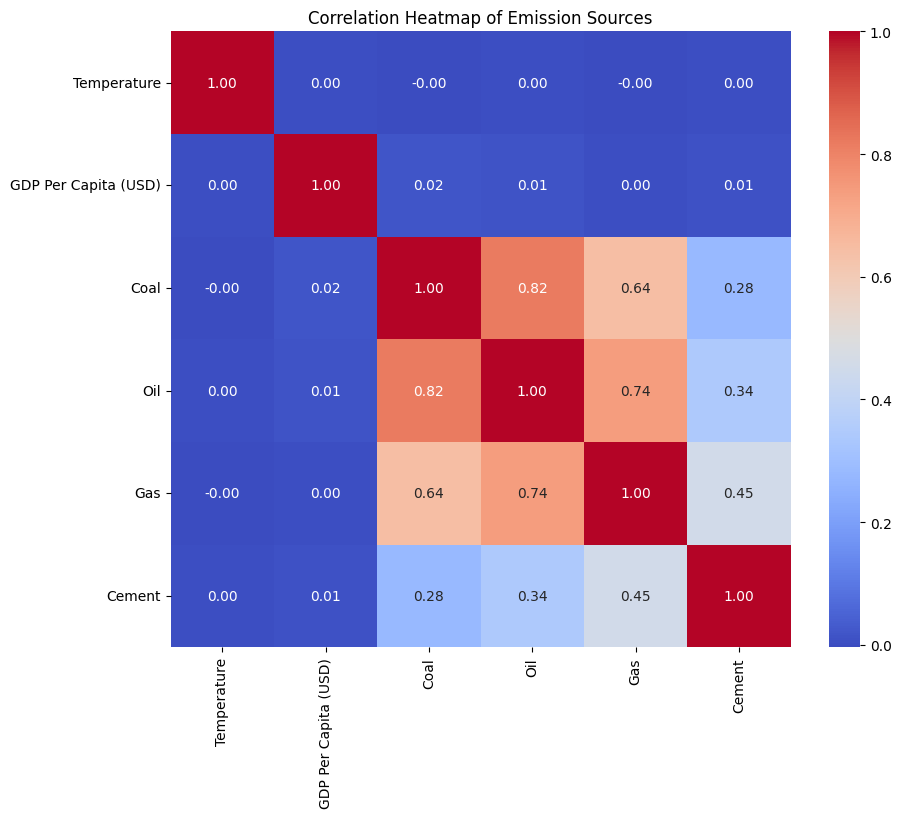

In [35]:
plt.figure(figsize=(10, 8))
correlation_matrix = emission.iloc[:, 4:10].corr()  # Adjust index range for features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Emission Sources')
plt.show()



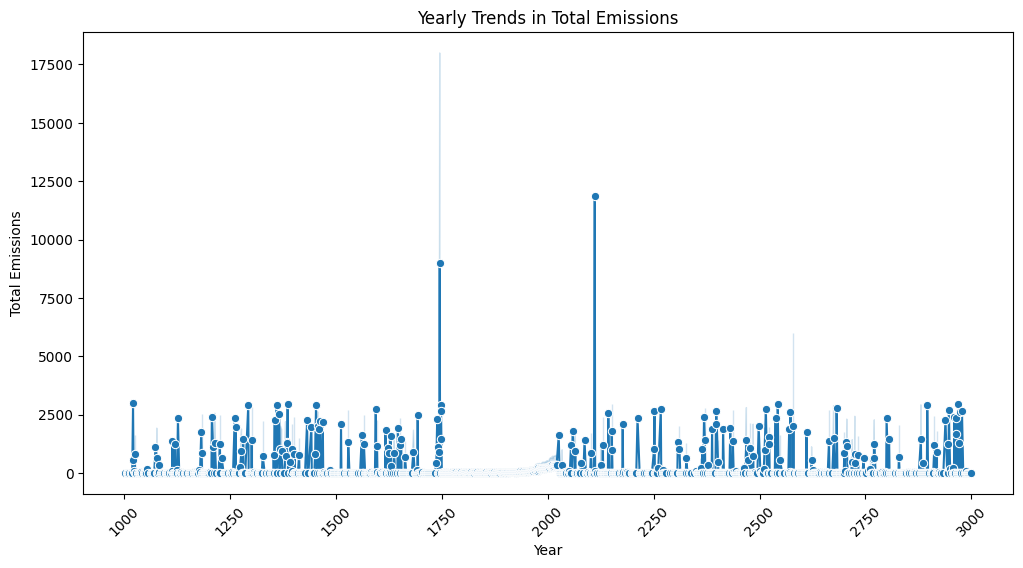

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total', data=emission, marker='o')
plt.title('Yearly Trends in Total Emissions')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.show()


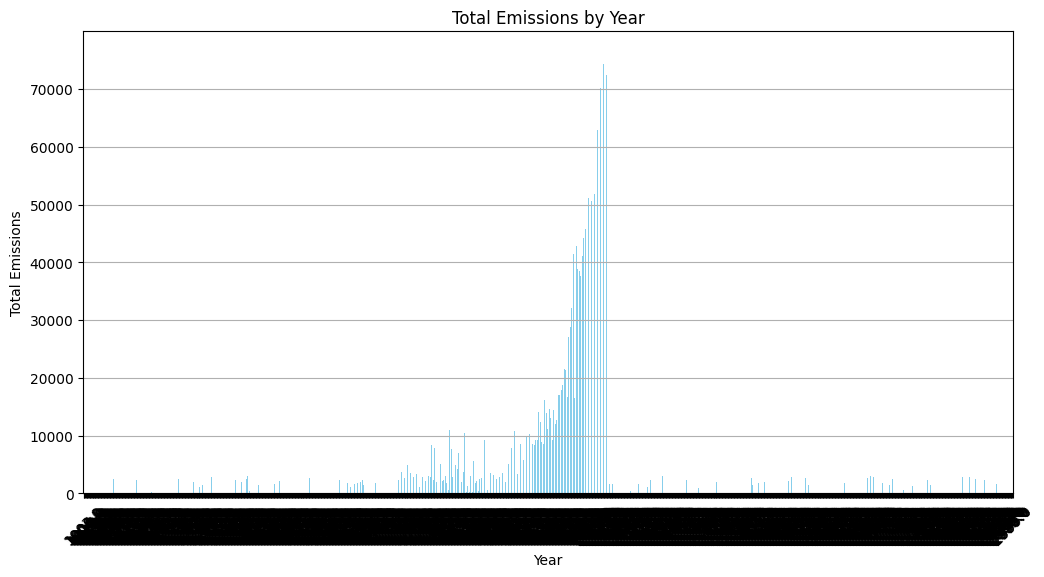

In [37]:
import matplotlib.pyplot as plt

# Group the data by year and sum the total emissions
total_emissions_by_year = emission.groupby('Year')['Total'].sum()

plt.figure(figsize=(12, 6))
total_emissions_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


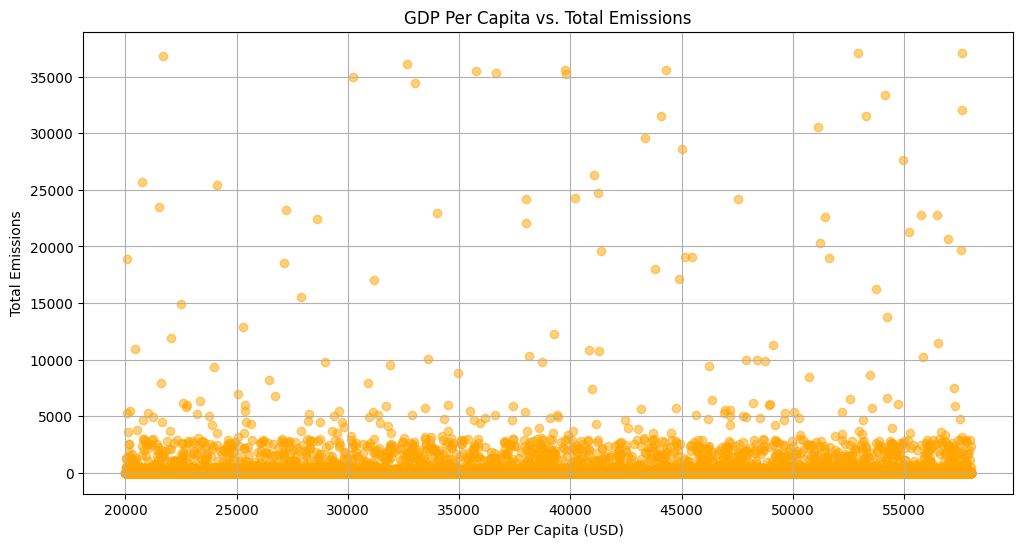

In [38]:
plt.figure(figsize=(12, 6))
plt.scatter(emission['GDP Per Capita (USD)'], emission['Total'], alpha=0.5, color='orange')
plt.title('GDP Per Capita vs. Total Emissions')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Total Emissions')
plt.grid()
plt.show()


In [39]:
emission_threshold = emission['Total'].median()  # 
emission['is_high_emission'] = (emission['Total'] > emission_threshold).astype(int)

numeric_cols = emission.select_dtypes(include=[np.number]).columns.tolist()

correlation_matrix = emission[numeric_cols].corr()
print(correlation_matrix['is_high_emission'])

low_correlation_features = correlation_matrix[correlation_matrix['is_high_emission'].abs() < 0.1].index.tolist()
if 'is_high_emission' in low_correlation_features:
    low_correlation_features.remove('is_high_emission') 

print("Uncorrelated Features:", low_correlation_features)
emission_reduced = emission.drop(columns=low_correlation_features)

print(emission_reduced.head())

Year                    0.425868
Total                   0.118505
Temperature            -0.004509
GDP Per Capita (USD)   -0.002923
Coal                   -0.291183
Oil                    -0.430860
Gas                    -0.576470
Cement                 -0.190307
Flaring                -0.574213
Other                  -0.649238
Per Capita             -0.351549
is_high_emission        1.000000
Name: is_high_emission, dtype: float64
Uncorrelated Features: ['Temperature', 'GDP Per Capita (USD)']
       Country ISO 3166-1 alpha-3    Year  Total  Coal  Oil  Gas  Cement  \
0  Afghanistan                AFG  1750.0    0.0   NaN  NaN  NaN     NaN   
1  Afghanistan                AFG  1751.0    0.0   NaN  NaN  NaN     NaN   
2  Afghanistan                AFG  1752.0    0.0   NaN  NaN  NaN     NaN   
3  Afghanistan                AFG  1753.0    0.0   NaN  NaN  NaN     NaN   
4  Afghanistan                AFG  1754.0    0.0   NaN  NaN  NaN     NaN   

   Flaring  Other  Per Capita  is_high_emissi

In [55]:
country_unique = emission['Country'].unique()
for country in country_unique:
    emission[country] = emission['Country'].apply(lambda x: 1 if x == country else 0)


In [41]:

min_value_1 = emission['Coal'].min()
max_value_1 = emission['Coal'].max()
emission['Coal'] = (emission['Coal'] - min_value_1) / (max_value_1 - min_value_1)

min_value_2 = emission['Oil'].min()
max_value_2 = emission['Oil'].max()
emission['Oil'] = (emission['Oil'] - min_value_2) / (max_value_2 - min_value_2)

min_value_3 = emission['Gas'].min()
max_value_3 = emission['Gas'].max()
emission['Gas'] = (emission['Gas'] - min_value_3) / (max_value_3 - min_value_3)

min_value_4 = emission['Cement'].min()
max_value_4 = emission['Cement'].max()
emission['Cement'] = (emission['Cement'] - min_value_4) / (max_value_4 - min_value_4)

min_value_5 = emission['Flaring'].min()
max_value_5 = emission['Flaring'].max()
emission['Flaring'] = (emission['Flaring'] - min_value_5) / (max_value_5 - min_value_5)

min_value_6 = emission['Other'].min()
max_value_6 = emission['Other'].max()
emission['Other'] = (emission['Other'] - min_value_6) / (max_value_6 - min_value_6)

print(emission.head())


       Country ISO 3166-1 alpha-3    Year  Total  Temperature  \
0  Afghanistan                AFG  1750.0    0.0    70.000000   
1  Afghanistan                AFG  1751.0    0.0    66.000000   
2  Afghanistan                AFG  1752.0    0.0    49.497813   
3  Afghanistan                AFG  1753.0    0.0    49.497813   
4  Afghanistan                AFG  1754.0    0.0    49.497813   

   GDP Per Capita (USD)  Coal  Oil  Gas  Cement  ...  Uzbekistan  Vanuatu  \
0                 55455   NaN  NaN  NaN     NaN  ...           0        0   
1                 45101   NaN  NaN  NaN     NaN  ...           0        0   
2                 31891   NaN  NaN  NaN     NaN  ...           0        0   
3                 35466   NaN  NaN  NaN     NaN  ...           0        0   
4                 33247   NaN  NaN  NaN     NaN  ...           0        0   

   Venezuela  Viet nam  Wallis and futuna islands  Yemen  Zambia  Zimbabwe  \
0          0         0                          0      0       0    

In [44]:
import pickle

In [45]:
print(np.unique(penguins['island']))

[0 1]


In [46]:
penguins['gender'] = penguins['gender'].apply(lambda x: 1 if x == 'male' else 0)
penguins['species']= penguins['species'].astype('category').cat.codes 

In [48]:
# Assuming 'penguins' is your preprocessed DataFrame
X = penguins.drop(columns=['island']).values  # Replace 'is_male' with the appropriate target column if needed
Y = penguins['island'].values.reshape(-1, 1)  # Ensure Y is a column vector

# Split into training (80%) and test (20%) datasets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = Y[:split_index], Y[split_index:]

# Print shapes
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (275, 12), y_train shape: (275, 1)
X_test shape: (69, 12), y_test shape: (69, 1)


In [49]:
print(np.unique(Y))

[0 1]


In [50]:
class LogitRegression:
    def __init__(self, learning_rate=0.001, iterations=100000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []

    def sigmoid(self, z):
        # Sigmoid function
        return 1 / (1 + np.exp(-z))

    def cost(self, h, y):
        # Loss function
        m = len(y)
        return (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    def gradient_descent(self, X, y):
        m, n = X.shape
        # Initialize weights and bias
        self.weights = np.random.uniform(0, 1, (n, 1))
        self.bias = 0

        # Gradient Descent Loop
        for i in range(self.iterations):
            # Linear model
            z = np.dot(X, self.weights) + self.bias
            # Prediction using sigmoid
            y_hat = self.sigmoid(z)
            # Calculate gradients
            dw = (1/m) * np.dot(X.T, (y_hat - y))
            db = (1/m) * np.sum(y_hat - y)
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            # Compute and store the loss
            self.loss.append(self.cost(y_hat, y))
            if i % 100 == 0:
                print(f'Iteration : {i}',self.loss[-1])

    def fit(self, X, y):
        self.gradient_descent(X, y)

    def predict(self, X):
        # Predict binary outcomes
        z = np.dot(X, self.weights) + self.bias
        y_hat = self.sigmoid(z)
        return (y_hat >= 0.5).astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_32008\613361099.py:14: RuntimeWarning: divide by zero encountered in log
  return (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
C:\Users\HP\AppData\Local\Temp\ipykernel_32008\613361099.py:14: RuntimeWarning: invalid value encountered in multiply
  return (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
C:\Users\HP\AppData\Local\Temp\ipykernel_32008\613361099.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration : 0 nan
Iteration : 100 nan
Iteration : 200 nan
Iteration : 300 nan
Iteration : 400 nan
Iteration : 500 nan
Iteration : 600 nan
Iteration : 700 nan
Iteration : 800 nan
Iteration : 900 nan
Accuracy: 86.96%


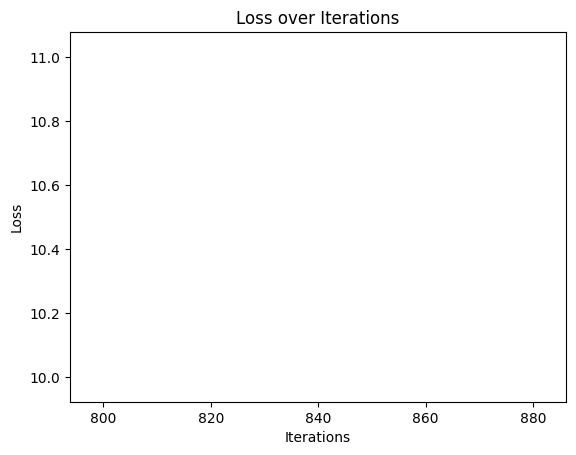

In [51]:

np.random.seed(0)
    
n_samples = len(X)
    

# Shuffle the indices randomly
indices = np.arange(n_samples)
np.random.shuffle(indices)

split_index = int(0.8 * n_samples)

train_indices = indices[:split_index]
test_indices = indices[split_index:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = Y[train_indices], Y[test_indices]

model = LogitRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy1 = np.mean(predictions == y_test) * 100
print(f'Accuracy: {accuracy1:.2f}%')

# Plotting the loss graph
plt.plot(range(len(model.loss)), model.loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

In [52]:

penguins.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year,Adelie,Gentoo,Chinstrap
0,0,1,6563.0,11.0,0.075922,0.049054,0.033333,0.529347,1,2007.0,1,0,0
1,0,1,4890.0,14.0,0.080260,0.037666,0.200000,0.538575,0,2007.0,1,0,0
2,0,1,7184.0,11.0,0.088937,0.042922,0.500000,0.437062,0,2007.0,1,0,0
3,0,1,4169.0,8.0,0.294555,0.035739,0.386667,0.020303,1,2007.0,1,0,0
4,0,1,4774.0,8.0,0.049892,0.054310,0.433333,0.473976,0,2007.0,1,0,0


In [53]:

print(np.unique(y_test))

[0 1]


In [54]:

with open('best_model_weights.pickle', 'wb') as f:
    pickle.dump({'weights': model.weights, 'bias': model.bias}, f)